In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import warnings
warnings.simplefilter('ignore')
import mplfinance as mpf
from pandas.plotting import lag_plot
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Downloading the stock data
start = '2015-01-01'
end = '2020-07-30'
ticker0 = 'JNJ'
interval = "1d"
df0 =yf.download(ticker0,start,end,interval)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Downloading the stock data
start = '2015-01-01'
end = '2020-07-30'
ticker1 = 'K'
interval = "1d"
df1 =yf.download(ticker1,start,end,interval)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculating the stock return
df0['Return'] =100*df0['Adj Close'].pct_change()
df0.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df0.dropna(inplace=True)

In [5]:
# Calculating the stock return
df1['Return'] =100*df1['Adj Close'].pct_change()
df1.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df1.dropna(inplace=True)

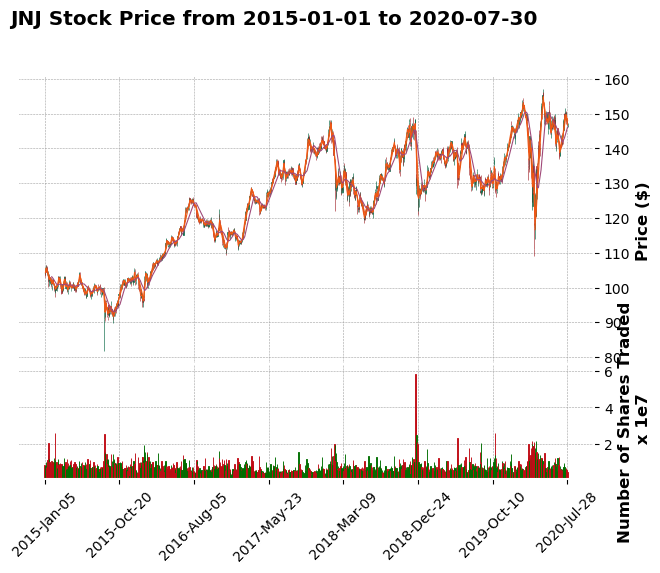

In [6]:
# Visualizing the stock price and volume

mpf.plot(df0, type='candle', style='charles',
            title=ticker0+' Stock Price from '+start+' to '+end ,
            ylabel='Price ($)',
            ylabel_lower='Number of Shares Traded',
            volume=True, 
            mav=(3,6,20), 
           )
plt.show()

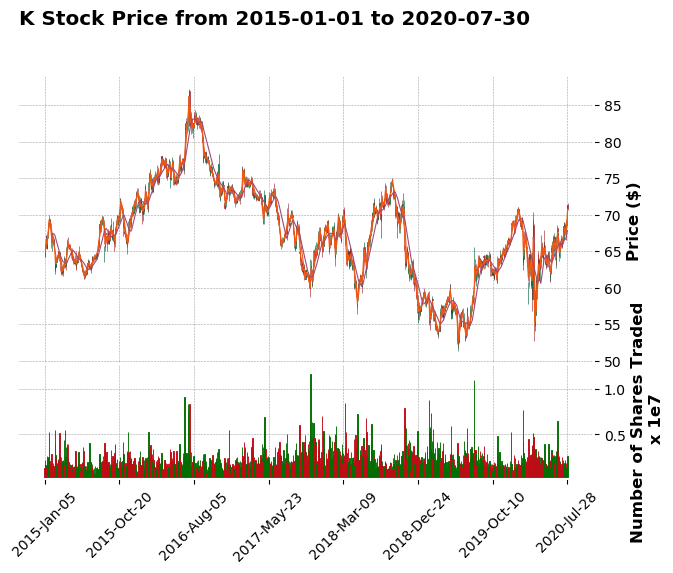

In [7]:
# Visualizing the stock price and volume

mpf.plot(df1, type='candle', style='charles',
            title=ticker1+' Stock Price from '+start+' to '+end ,
            ylabel='Price ($)',
            ylabel_lower='Number of Shares Traded',
            volume=True, 
            mav=(3,6,20), 
           )
plt.show()

In [8]:
# Information summary of the stock data
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2015-01-05 to 2020-07-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1402 non-null   float64
 1   High       1402 non-null   float64
 2   Low        1402 non-null   float64
 3   Close      1402 non-null   float64
 4   Adj Close  1402 non-null   float64
 5   Volume     1402 non-null   int64  
 6   Return     1402 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [9]:
# Information summary of the stock data
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2015-01-05 to 2020-07-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1402 non-null   float64
 1   High       1402 non-null   float64
 2   Low        1402 non-null   float64
 3   Close      1402 non-null   float64
 4   Adj Close  1402 non-null   float64
 5   Volume     1402 non-null   int64  
 6   Return     1402 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [10]:
# Describtive statistical summary of stock data
df0.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1.402000e+03,1402.000000
mean,124.466519,125.344643,123.552768,124.484194,114.740364,7.472987e+06,0.042402
std,15.892728,16.054849,15.741018,15.882112,18.896744,3.402751e+06,1.227700
min,90.699997,91.879997,81.790001,90.730003,78.699524,2.353800e+06,-10.037869
25%,112.797501,113.402502,112.272497,112.812502,100.079229,5.525175e+06,-0.444299
50%,127.994999,129.105003,126.925003,128.065002,119.406631,6.707000e+06,0.049306
75%,137.450005,138.547497,136.417500,137.312504,129.464581,8.503900e+06,0.597009
max,155.570007,157.000000,154.000000,155.509995,152.359604,5.814020e+07,7.997725


In [11]:
# Describtive statistical summary of stock data
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1.402000e+03,1402.000000
mean,67.357568,67.929151,66.800014,67.382154,60.267225,2.284562e+06,0.028247
std,6.390736,6.366758,6.428655,6.396123,5.089404,1.178893e+06,1.406815
min,51.450001,52.720001,51.340000,52.090000,48.861458,3.748000e+05,-10.919369
25%,63.275001,63.880001,62.612500,63.242501,55.813705,1.536300e+06,-0.598855
50%,66.970001,67.489998,66.344997,66.969997,60.779940,1.990650e+06,0.070966
75%,71.910004,72.389999,71.465000,71.917500,64.121881,2.708750e+06,0.659298
max,86.900002,87.160004,85.400002,86.980003,74.812561,1.159840e+07,10.645785


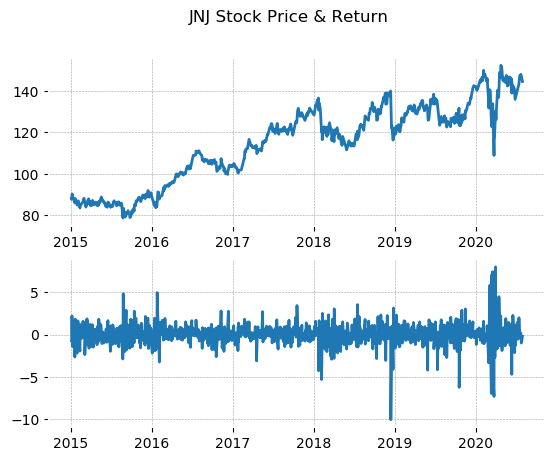

In [12]:
# Plotting Stock Price and Return
fig, axs = plt.subplots(2)
fig.suptitle(ticker0+' Stock Price & Return')
axs[0].plot(df0.index, df0['Adj Close'])
axs[1].plot(df0.index, df0['Return'])
plt.show()

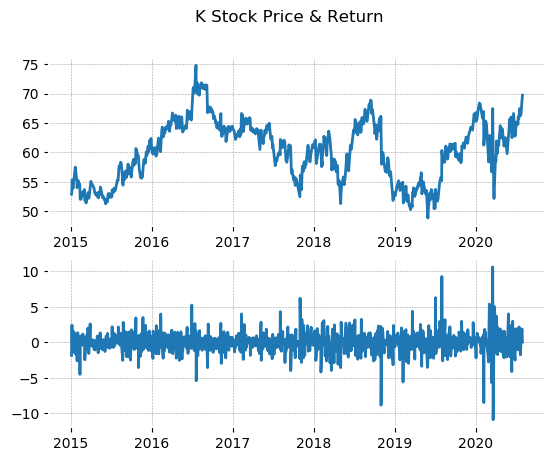

In [13]:
# Plotting Stock Price and Return
fig, axs = plt.subplots(2)
fig.suptitle(ticker1+' Stock Price & Return')
axs[0].plot(df1.index, df1['Adj Close'])
axs[1].plot(df1.index, df1['Return'])
plt.show()

No handles with labels found to put in legend.


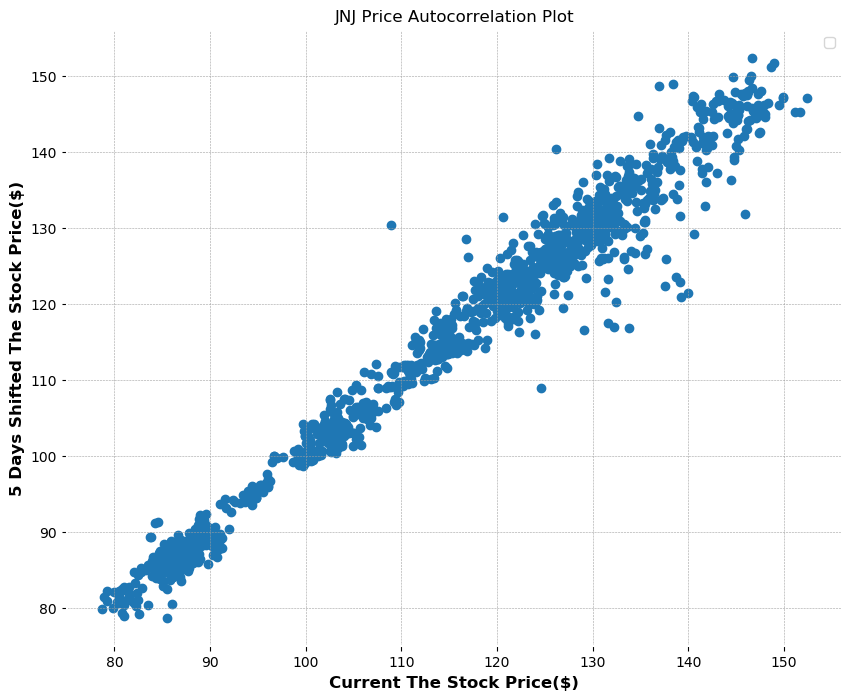

In [14]:
# The stock price's 5 days autocorrelation
plt.figure(figsize=(10,8))
lag_plot(df0['Adj Close'], lag=5)
plt.title(ticker0+' Price Autocorrelation Plot')
plt.xlabel('Current The Stock Price($)')
plt.ylabel('5 Days Shifted The Stock Price($)')
plt.grid(True)
plt.legend()
plt.show()

No handles with labels found to put in legend.


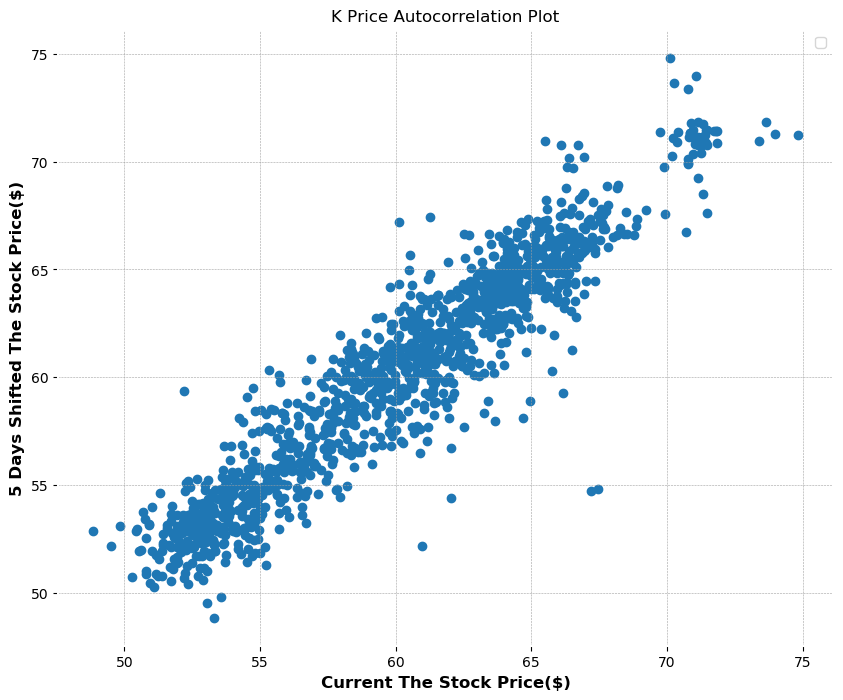

In [15]:
# The stock price's 5 days autocorrelation
plt.figure(figsize=(10,8))
lag_plot(df1['Adj Close'], lag=5)
plt.title(ticker1+' Price Autocorrelation Plot')
plt.xlabel('Current The Stock Price($)')
plt.ylabel('5 Days Shifted The Stock Price($)')
plt.grid(True)
plt.legend()
plt.show()

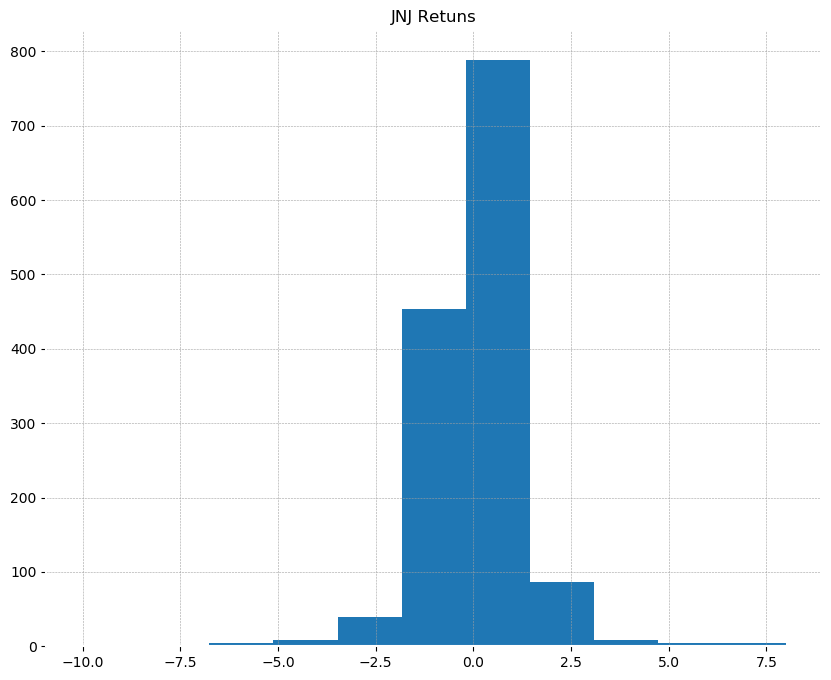

In [16]:
# Visualizing Distribution of Stock Returns
bins = int(round(1 + (3.322*np.log10(len(df0)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df0['Return'].values,bins=bins)
plt.xlabel = 'Returns'
plt.ylabel = 'Frequency'
plt.title(ticker0+' Retuns')
plt.show()

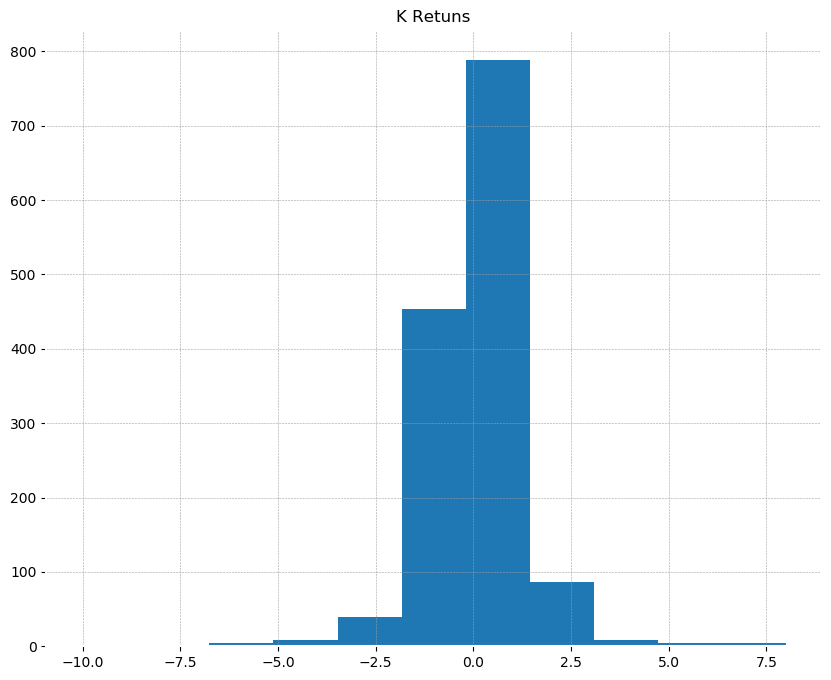

In [17]:
# Visualizing Distribution of Stock Returns
bins = int(round(1 + (3.322*np.log10(len(df1)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df0['Return'].values,bins=bins)
plt.xlabel = 'Returns'
plt.ylabel = 'Frequency'
plt.title(ticker1+' Retuns')
plt.show()

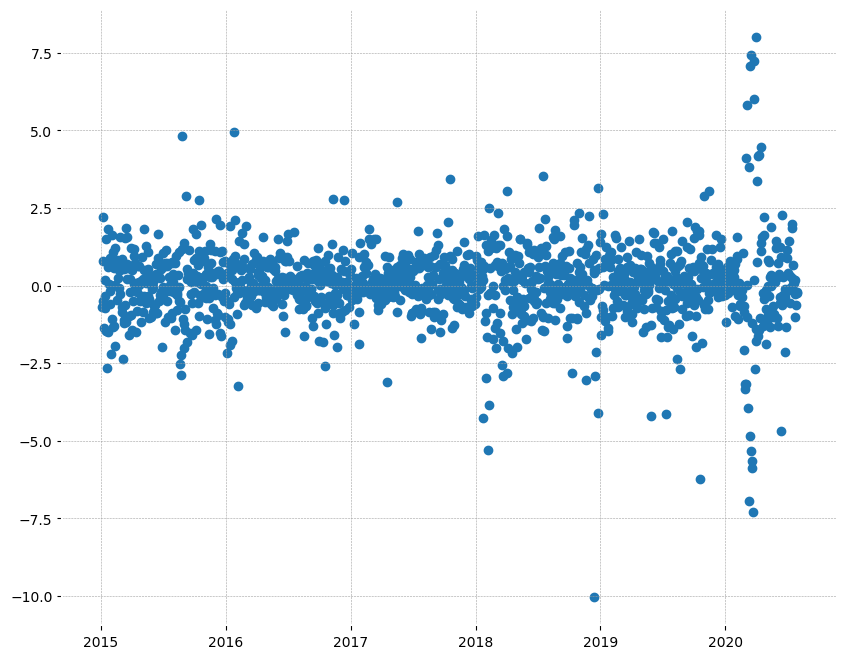

In [18]:
# The stock returns overtime
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df0.index,y=df0['Return'].values)
plt.show()

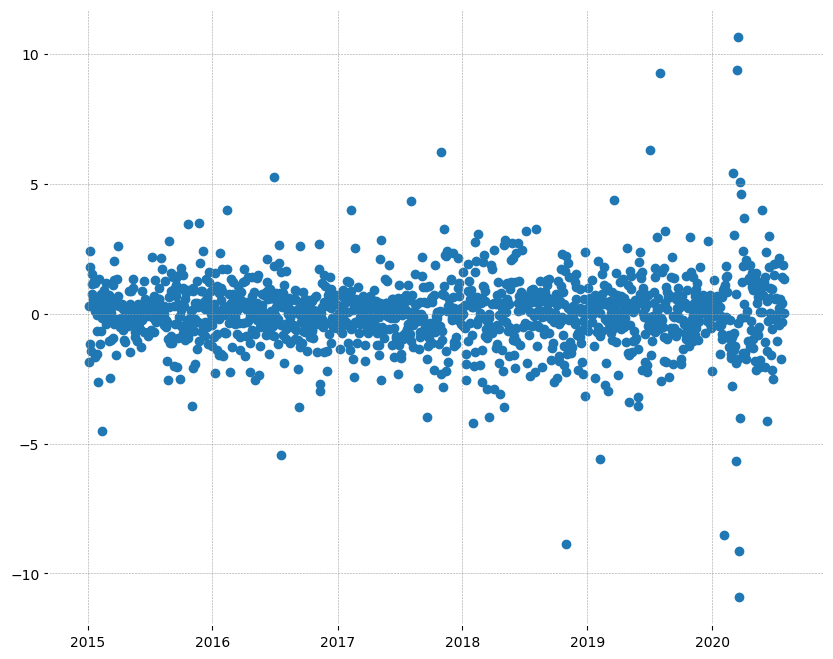

In [19]:
# The stock returns overtime
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df1.index,y=df1['Return'].values)
plt.show()

In [20]:

split_date = '2020-02-07'
forcast_first_observation_date = '2020-02-08'
model0 = arch_model(df0['Return'], vol='Garch', p=1, o=0, q=1, dist='skewt')
res0 = model0.fit(disp='off',last_obs=split_date)
forecasts0 = res0.forecast(start = forcast_first_observation_date)
cond_mean0 = forecasts0.mean[forcast_first_observation_date:]
cond_var0 = forecasts0.variance[forcast_first_observation_date:]
cond_vol0 = res0.conditional_volatility

In [21]:
model1 = arch_model(df1['Return'], vol='Garch', p=1, o=0, q=1, dist='skewt')
res1 = model1.fit(disp='off',last_obs=split_date)
forecasts1 = res1.forecast(start = forcast_first_observation_date)
cond_mean1 = forecasts1.mean[forcast_first_observation_date:]
cond_var1 = forecasts1.variance[forcast_first_observation_date:]
cond_vol1 = res1.conditional_volatility

In [22]:
# Compute standardized residuals from the fitted GARCH models

std_resid_df0 = (res0.resid/cond_vol0).dropna()
std_resid_df1 = (res1.resid/cond_vol1).dropna()

print(std_resid_df0.head())
print(std_resid_df1.head())
print(std_resid_df0.describe())
print(std_resid_df1.describe())
corr = np.corrcoef(std_resid_df0, std_resid_df1)[0,1]


Date
2015-01-05   -0.636859
2015-01-06   -0.477398
2015-01-07    1.873145
2015-01-08    0.586340
2015-01-09   -1.206873
dtype: float64
Date
2015-01-05   -1.384882
2015-01-06    0.211038
2015-01-07    1.791221
2015-01-08    1.262379
2015-01-09   -0.795588
dtype: float64
count    1282.000000
mean       -0.024099
std         1.029420
min       -11.144486
25%        -0.508109
50%        -0.007670
75%         0.556086
max         4.539505
dtype: float64
count    1282.000000
mean        0.008230
std         0.974467
min        -7.812144
25%        -0.443050
50%         0.054712
75%         0.484927
max         6.972546
dtype: float64


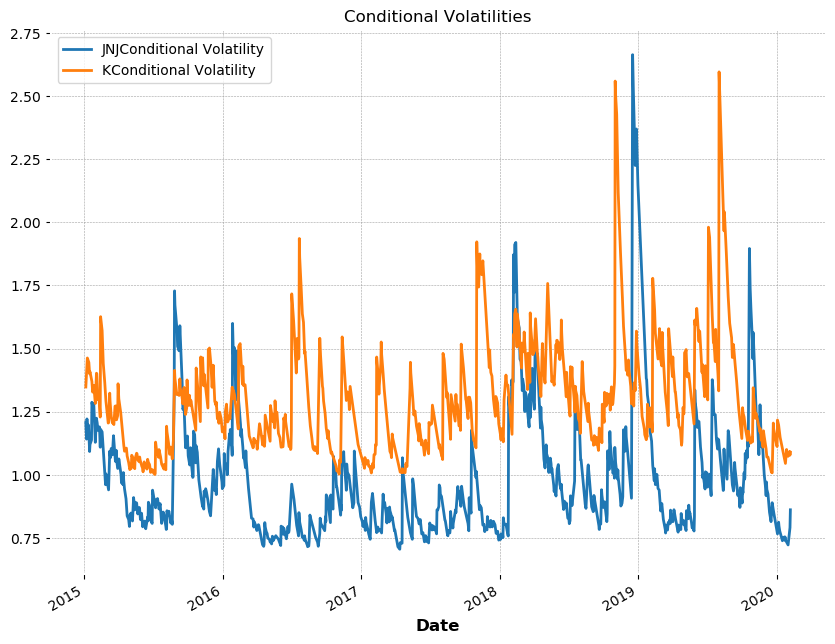

In [26]:
fig = plt.figure(figsize=(10,8))
plt.title('Conditional Volatilities')
cond_vol0.plot(label=ticker0+'Conditional Volatility')
cond_vol1.plot(label=ticker1+'Conditional Volatility')
plt.legend()
plt.show()

Date
2015-01-05    0.443763
2015-01-06    0.445198
2015-01-07    0.420179
2015-01-08    0.478996
2015-01-09    0.473835
Name: cond_vol, dtype: float64


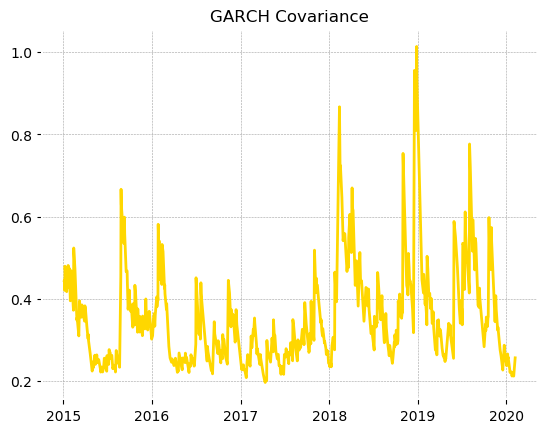

In [23]:
covariance = corr * cond_vol0 *cond_vol1
print(covariance.head())
# Plot the data
plt.plot(covariance, color = 'gold')
plt.title('GARCH Covariance')
plt.show()

In [27]:
# Define weights
Wa1 = 0.9
Wa2 = 1 - Wa1
Wb1 = 0.5
Wb2 = 1 - Wb1

In [28]:
# Calculate portfolio variance
portvar_a = Wa1**2 * cond_vol0 + Wa2**2 * cond_vol1 + 2*Wa1*Wa2 *covariance
portvar_b = Wb1**2 *cond_vol0 + Wb2**2 * cond_vol1 + 2*Wb1*Wb2*covariance


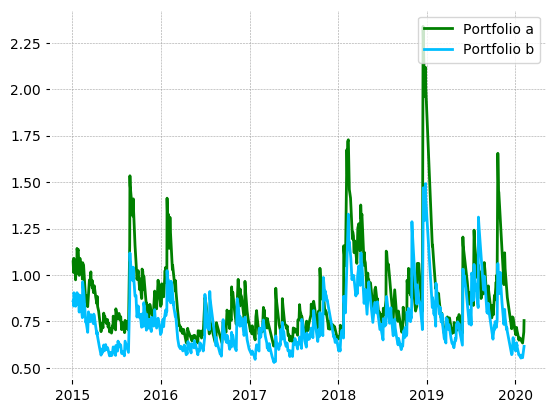

In [29]:
# Plot the data
plt.plot(portvar_a, color = 'green', label = 'Portfolio a')
plt.plot(portvar_b, color = 'deepskyblue', label = 'Portfolio b')
plt.legend(loc = 'upper right')
plt.show()

In [30]:
# Calculate portfolio returns
portret_a = df0['Return']*Wa1+df1['Return']*Wa2
portret_b = df0['Return']*Wb1+df1['Return']*Wb2

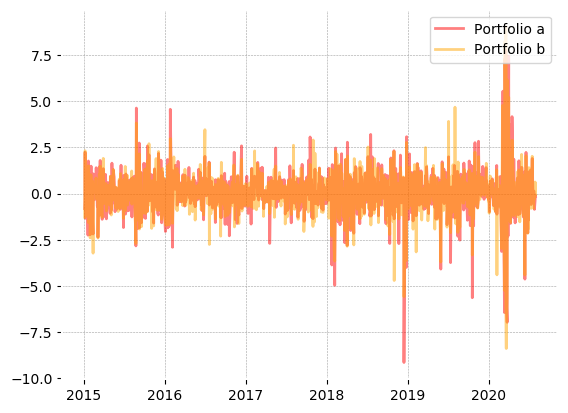

In [34]:
# Plot the data
plt.plot(portret_a, color = 'red', label = 'Portfolio a',alpha=0.5)
plt.plot(portret_b, color = 'orange', label = 'Portfolio b',alpha=0.5)
plt.legend(loc = 'upper right')
plt.show()

In [35]:
# Calculate portfolio sharpe-ratio
rf= 0.05
portsharpe_a = (portret_a-rf)/portvar_a**0.5
portsharpe_b = (portret_b-rf)/portvar_b**0.5

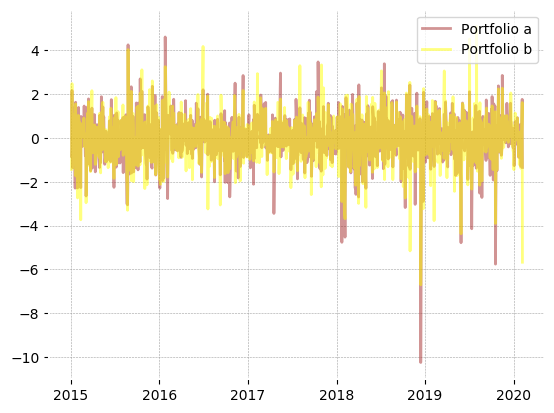

In [41]:
# Plot the data
plt.plot(portsharpe_a, color = 'brown', label = 'Portfolio a',alpha=0.5)
plt.plot(portsharpe_b, color = 'yellow', label = 'Portfolio b',alpha=0.5)
plt.legend(loc = 'upper right')
plt.show()